# Análisis de datos

In [1]:
import pandas as pd
df=pd.read_csv("Automobile_data.csv")
df.head(3)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0


## Explorar los datos

In [10]:
#determinar el tamaño de la tabla (DataFrame)
df.shape

(61, 10)

In [11]:
#verificar el tipo de los datos de cada columna 
df.dtypes

index                 int64
company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object

In [13]:
#Información resumida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
index               61 non-null int64
company             61 non-null object
body-style          61 non-null object
wheel-base          61 non-null float64
length              61 non-null float64
engine-type         61 non-null object
num-of-cylinders    61 non-null object
horsepower          61 non-null int64
average-mileage     61 non-null int64
price               58 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.8+ KB


In [14]:
#Genera las estadísticas desdcriptivas de la tabla
df.describe()

,index,wheel-base,length,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,58.000000
mean,40.885246,98.481967,173.098361,107.852459,25.803279,15387.000000
std,25.429706,6.679234,14.021846,53.524398,8.129821,11320.259841
min,0.000000,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,18.000000,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,39.000000,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,61.000000,101.200000,177.300000,123.000000,31.000000,18120.500000
max,88.000000,120.900000,208.100000,288.000000,47.000000,45400.000000


In [56]:
#El maximo o mínimo de una colmna
df['length'].max()

208.1

In [16]:
# Escribe las columnas que tiene una tabla
df.columns

Index(['index', 'company', 'body-style', 'wheel-base', 'length', 'engine-type',
       'num-of-cylinders', 'horsepower', 'average-mileage', 'price'],
      dtype='object')

## Determinar si hay valores faltantes

-  NaN - Not a Number
-  NaT - Not a DateTime
-  None - valor vacío asignado a una variable
-  vacío

In [42]:
#Crear un DataFrame con valores faltantes
import numpy as np
df_faltantes = pd.DataFrame({'edad': [19, 46, np.NaN,28],
                   'fecha': [pd.Timestamp('2000-12-25'),pd.NaT, pd.Timestamp('1995-04-25'),  pd.Timestamp('2010-07-2')],                            
                   'nombre': ['Maria', 'Francisco', '', 'Guadalupe'],
                   'apodo': [None, 'Paco', 'Lalo', 'Lupita']})

In [20]:
df_faltantes

,edad,fecha,nombre,apodo
0,19.0,2000-12-25,Maria,None
1,46.0,NaT,Francisco,Paco
2,NaN,1995-04-25,,Lalo
3,28.0,2010-07-02,Guadalupe,Lupita


In [22]:
#detecta valores faltantes
df_faltantes.isna()

,edad,fecha,nombre,apodo
0,False,False,False,True
1,False,True,False,False
2,True,False,False,False
3,False,False,False,False


In [25]:
# ver cuantos valores faltantes hay en cada columna (igual con isna)
df_faltantes.isnull().sum()
# df_faltantes['edad'].isnull().sum()  #o ver faltantes de una sola columna

edad      1
fecha     1
nombre    0
apodo     1
dtype: int64

In [29]:
#Despliega los que tienen un valor vacío
df_faltantes[df_faltantes['nombre']==""]

,edad,fecha,nombre,apodo
2,NaN,1995-04-25,,Lalo


### ¿Qué se va a hacer con los valores faltantes?

In [24]:
#Eliminar renglones con faltantes
f=df_faltantes.dropna()
f

,edad,fecha,nombre,apodo
3,28.0,2010-07-02,Guadalupe,Lupita


In [26]:
#llena faltantes con un valor determinado
f=df_faltantes['edad'].fillna(10.0)
f

0    19.0
1    46.0
2    10.0
3    28.0
Name: edad, dtype: float64

In [31]:
#Llena faltantes con la media o mediana
media=df_faltantes['edad'].mean();
#mediana=df_faltantes['edad'].median();
df_faltantes['edad']=df_faltantes['edad'].fillna(media)
df_faltantes['edad']

0    19.0
1    46.0
2    31.0
3    28.0
Name: edad, dtype: float64

In [32]:
#Llena los vacíos con algún valor
df_faltantes['nombre']=df_faltantes['nombre'].replace("", "NO dijo")
df_faltantes

,edad,fecha,nombre,apodo
0,19.0,2000-12-25,Maria,None
1,46.0,NaT,Francisco,Paco
2,31.0,1995-04-25,NO dijo,Lalo
3,28.0,2010-07-02,Guadalupe,Lupita


In [44]:
df_faltantes['fecha']= df_faltantes['fecha'].fillna(date.today().strftime("%Y-%m-%d"))
df_faltantes

,edad,fecha,nombre,apodo
0,19.0,2000-12-25 00:00:00,Maria,None
1,46.0,2020-04-28,Francisco,Paco
2,NaN,1995-04-25 00:00:00,,Lalo
3,28.0,2010-07-02 00:00:00,Guadalupe,Lupita


In [52]:
df.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

## Consultas

In [59]:
#Despliega los que cumplen con una condición
df[df['company']=='toyota']

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156,19,15750.0


In [ ]:
#Despliega los coches que son convertibles 


In [66]:
#Despliega los sedanes de 4 cilindros
df[(df['body-style']=='sedan')&(df['num-of-cylinders']=='four')]  #  & and  | or

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
7,9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
8,10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0
9,11,bmw,sedan,101.2,176.8,ohc,six,121,21,20970.0
10,13,bmw,sedan,103.5,189.0,ohc,six,182,16,30760.0
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0


In [ ]:
# inventa una consulta con dos condiciones


In [58]:
#el coche con longitud mayor
df[['company','body-style']][df.length==df['length'].max()]

,company,body-style
34,mercedes-benz,sedan


##  Conteo de valores en una columna

In [91]:
df['company'].value_counts()

toyota           7
bmw              6
mazda            5
nissan           5
mitsubishi       4
mercedes-benz    4
audi             4
volkswagen       4
alfa-romero      3
honda            3
porsche          3
isuzu            3
chevrolet        3
jaguar           3
dodge            2
volvo            2
Name: company, dtype: int64

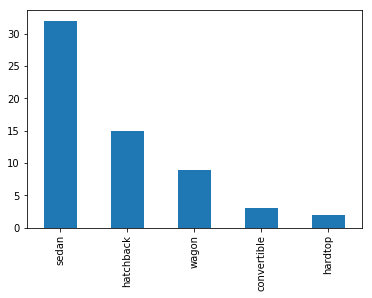

In [47]:
import matplotlib.pyplot as plt
df['body-style'].value_counts().plot(kind='bar')
plt.show()

In [68]:
#Agrupar los datos en grupos y hacer conteos
# cuantos coches hay con cada tipo de motor
df.groupby('engine-type').size()

engine-type
dohc      5
dohcv     1
l         1
ohc      46
ohcf      2
ohcv      5
rotor     1
dtype: int64

In [73]:
df['engine-type'].value_counts()

ohc      46
dohc      5
ohcv      5
ohcf      2
rotor     1
dohcv     1
l         1
Name: engine-type, dtype: int64

In [71]:
#Agrupado por compañía el precio promedio
df.groupby('company').agg({'price':np.mean})

,price
company,
alfa-romero,15498.333333
audi,16392.500000
bmw,27213.333333
chevrolet,6007.000000
dodge,6303.000000
honda,10195.000000
isuzu,6785.000000
jaguar,34600.000000
mazda,9654.800000


## Tablas dinámicas con Pandas

In [48]:
resxCompany=pd.pivot_table(df,index='company', values='price') #promedio por defecto
resxCompany

,price
company,
alfa-romero,15498.333333
audi,16392.500000
bmw,27213.333333
chevrolet,6007.000000
dodge,6303.000000
honda,10195.000000
isuzu,6785.000000
jaguar,34600.000000
mazda,9654.800000


<function matplotlib.pyplot.show(*args, **kw)>

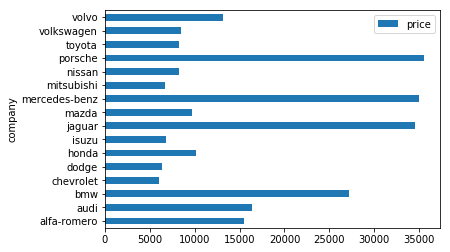

In [49]:
resxCompany.plot(kind='barh')
plt.show

In [ ]:
pd.pivot_table(df,index='company', values='price', aggfunc=sum)

Ejercicios con la tabla Automobile_data:
    1.  Identifica que valores faltantes tiene la tabla
    2.  Rellena los valores faltantes con alguna estrategia de tu elección
    3.  Despliega los coches con precio mayor a 10000
    4.  Despliega el coche más barato
    5.  Despliega los coches que son sedanes
    6.  Cuantos coches hay por numero de cilindros
    7. Encuentra el promedio de millas por compañía
    